In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import optimize
from scipy import stats
from scipy import constants as con
import pandas as pd

In [22]:
nist=-np.array([-2.4126419999999997e-07, -6.9620305e-07, -1.687699e-06, -2.45608e-06, -3.1075815e-06, -3.9076405000000005e-06, -3.8175709999999995e-06, -3.9654475e-06, -4.201332e-06, -4.104062499999999e-06, -4.2804305e-06, -4.167208e-06, -3.828397000000001e-06])
sipm=np.array([4.262345499999999e-06, 4.6516180000000006e-06, 5.57041e-06, 7.918716999999999e-06, 1.216526e-05, 1.7060214999999997e-05, 1.262104e-05, 1.301367e-05, 1.4327754999999999e-05, 1.0646574999999999e-05, 1.0308095e-05, 1.2072365e-05, 1.3196675e-05])
wavelength=np.arange(350,651,25)
df = np.array(pd.read_csv('C:/Users/Anwender/Documents/TUM/Masterarbeit/transmission_ND.csv', header=None)).transpose()
spectral=np.array(pd.read_csv('C:/Users/Anwender/Documents/TUM/Masterarbeit/nist.csv', skiprows=5, encoding='latin1',delimiter=";")).transpose()
xenon=np.array(pd.read_csv('C:/Users/Anwender/Documents/TUM/Masterarbeit/xenon_lamp_output.csv', header=None)).transpose()
mono=np.array(pd.read_csv('C:/Users/Anwender/Documents/TUM/Masterarbeit/mono.csv',sep=";",decimal=",")).transpose()
transmission=[]
nist_photons=[]

for wl in wavelength:
    idx=np.argwhere(df[0]==wl)
    transmission.append(float(df[1][idx][0]))
    idx2=np.argwhere(spectral[0]==wl)
    nist_photons.append(wl/(1000*con.c*con.h*float(spectral[1][idx2])))
sipm/=np.array(transmission)
nist*=np.array(nist_photons)

mono_interp = np.interp(xenon[0], mono[0], mono[1])
xenon_scaled =xenon[1]*mono_interp # xenon[1] * (nist[0] / xenon[1][0])


C:\Users\Anwender\AppData\Local\Temp\ipykernel_18492\2204219794.py:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  transmission.append(float(df[1][idx][0]))
C:\Users\Anwender\AppData\Local\Temp\ipykernel_18492\2204219794.py:15: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  nist_photons.append(wl/(1000*con.c*con.h*float(spectral[1][idx2])))


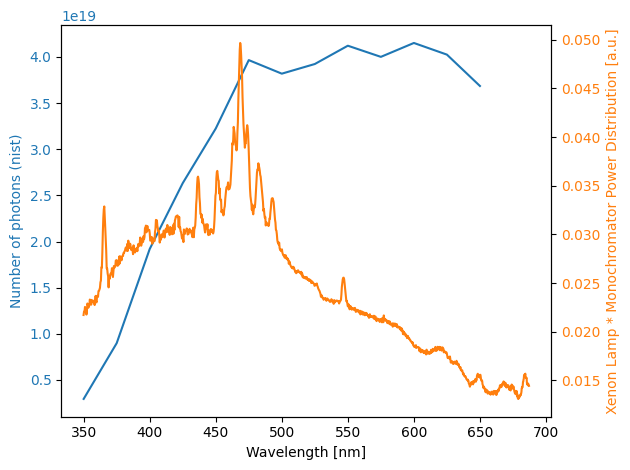

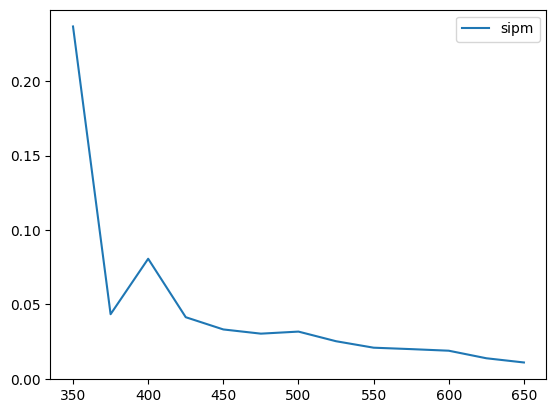

In [23]:

#Make Plots
fig, ax1 = plt.subplots()

# Left y-axis: nist
ax1.plot(wavelength, nist, label="nist", color="tab:blue")
ax1.set_xlabel("Wavelength [nm]")
ax1.set_ylabel("Number of photons (nist)", color="tab:blue")
ax1.tick_params(axis='y', labelcolor="tab:blue")

# Right y-axis: xenon_scaled in percent
ax2 = ax1.twinx()
ax2.plot(xenon[0], xenon_scaled, label="Xenon Lamp (%)", color="tab:orange")
ax2.set_ylabel("Xenon Lamp * Monochromator Power Distribution [a.u.]", color="tab:orange")
ax2.tick_params(axis='y', labelcolor="tab:orange")

fig.tight_layout()
plt.show()
#SiPM plot
plt.plot(wavelength, sipm, label="sipm")
plt.legend()
plt.show()